<div style="background:#FFFFAA">
<img src="logo.jpg", width=150, ALIGN="left", border=20>
    <h1>Team GAIASAVERS</h1>
    <h3>Alban Petit, Wafa Bouzouita,Timothée Babinet, Maxime Chor, Eric Wang, Sebastien Warichet</h3>
    <h2>Plankton classification challenge</h2>

<br>This code was tested with <br>
Python 3.7 |Anaconda custom (64-bit)| (default, Jun 28 2018, 11:07:29) (https://anaconda.org/)<br>
<i> Adapted for Chalab by Isabelle Guyon from original code of Balázs Kégl</i> <br>
<a href="http://www.datascience-paris-saclay.fr">Paris Saclay Center for Data Science (CDS)</a>
</center>
<p>
ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</div>

<div style="background:#FFFFAA">
    <h2>Introduction </h2>
     <br>
       
According to [NRMA15], a link has been found between the quality of water and the presence of plankton in said water. As water quality increases, the abundance and diversity of plankton does as well. The aim of our project is to build a plankton classifier to assess water quality.

We use for this problem the Bering Sea dataset, an in situ plankton dataset published in May 2019 by Kaichang Cheng [Che19]. This datset contains 7 classes with an even spread.

        
References and credits: 
- [NRMA15] A. Nair, J.K. Reshma, A. Mathew, and A. Ashok. Effect of water quality on phytoplankton abundance in selected ponds of nedumangad block panchayat, kerala. Emer Life Sci Res, 2015.
- [Che19] K. Cheng. Bering sea dataset. https://doi.org/10.6084/m9.figshare.8146283.v3, 2019.
 <br>
</div>

<img src="images/sample.png" alt="Drawing"/>
To see more images for each class, see the "images" folder.

In [1]:
model_dir = 'sample_code_submission/'                        # Change the model to a better one once you have one!
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
# Uncomment the next lines to auto-reload libraries (this causes some problem with pickles in Python 3)
%load_ext autoreload
%autoreload 2
import seaborn as sns; sns.set()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import pandas as pd

<div style="background:cyan">
    <h1>Plankton Visualization by Carlo-Elia DONCHECCHI & Ugo NZONGANI </h1>
    <ul>
        <h2><span style="color:red" >Team Plankton</span></h2>
        <h3>Preprocessing Group</h3>
        <li> Romain Mussard
        <li> Alexandre Bestandji
        <h3>Model Group</h3>
        <li> Ramdane Mouloua <i>(Group leader)</i>
        <li> Katia Fettat 
        <h3>Visualization Group</h3>
        <li> Ugo Nzongani
        <li> Carlo-Elia Donchecchi
    </ul>
    <ol>
    <h2><span style="color:red" >Teachers</span></h2>
    <p>Herilalaina Rakotoarison & Isabelle Guyon</p>
    </ol>
<p>
This files contains the code produced by the Visualization binomial of the Plankton team.
Our goal is to create usefull visualization in order to have a better understanding of the
problem and a better interpretation of the results
    <br>
        <h3>Updates:</h3>
    <ul> <span style="color:red">17/04/2020:</span>
        <li> adding description for performance's figures
        </ul>  
    <ul> <span style="color:red">14/04/2020:</span>
        <li> adding model comparison function
        </ul>  
    <ul> <span style="color:red">13/04/2020:</span>
        <li> adding model
        <li> cross-validation comments
        <li> adding new confusion matrix
        <li> improving model's performance figures
        </ul>            
    <ul> <span style="color:red">11/04/2020:</span>
    <li> adding comments
    <li> deleting unnecessary variables & lines
    <li> made the code more readable & clear
     </ul>
</div>

<div style="background:#FFFFAA">
    <h1> Step 1: Exploratory data analysis </h1>
<p>
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.
    <br>
    <span style="color:red"> Just change the data name in the block below. In the rest of the section, replace the sample plots by anything you want. </span>
</div>

In [2]:
#data_dir = 'sample_data'              # Change this to the directory where you put the input data
data_dir = 'public_data'          # The sample_data directory should contain only a very small subset of the data
data_name = 'plankton'
!ls $data_dir*

plankton_feat.name    plankton_test.data       plankton_valid.data
plankton_label.name   plankton_train.data
plankton_public.info  plankton_train.solution


<h3>Two "feature representation"</h3>

<p>
1.
All of the images are in various shades of gray. As such, we can represent every image by a vector of 90000 (300x300) features where each feature is a float value between 0 and 255 representing the brightness of a pixel (0 being a black pixel and 255 a white one). It is also possible to reduce the size of the images to reduce the number of features as seen in figure 3 where we reduced the size to 100x100 pixels.
</p>

<tr>
    <td> <img src="images/gray.png" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="images/binarized.png" alt="Drawing" style="width: 250px;"/> </td>
</tr>


<p>
2. At first we will have four types of "features". Two "features" are applied on the binarized images.
    <ul>
        <li>The first is a sum of black pixels, per line and per column.
This gives us 2 vectors of size 100. These "features" are representative among others of the shape of the plankton.
For round seeders the ratio between rows and columns near the center of the image should be close.
For longer plankton the ratio will be either low or high, depending on plankton position.
        </li>
        <li>The second is the average of the pixels.
            This gives us information on the size of the plankton.
        </li>
        <li>The third feature is the variance and is applied to non-binarized images.</li>
        <li>The last feature is the length of the contour of the plankton. It is obtained by applying a sobel filter on the image. This filter will put black pixels on the contours and white ones everywhere else. We can then just compute the amount of black pixels.
    </ul>
</p>

For convenience, we load the data as a "pandas" data frame, so we can use "pandas" and "seaborn" built in functions to explore the data.

In [3]:
from data_io import read_as_df
data = read_as_df(data_dir  + '/' + data_name)                # The data are loaded as a Pandas Data Frame

Reading public_data/plankton_train from AutoML format
Number of examples = 10752
Number of features = 203
          Class
0  chaetognatha
1      copepoda
2   euphausiids
3   fish_larvae
4      limacina
5       medusae
6         other
Number of classes = 7


This shows the distribution of labels in the training set

In [4]:
data['target'].value_counts()

copepoda        1536
medusae         1536
euphausiids     1536
limacina        1536
chaetognatha    1536
other           1536
fish_larvae     1536
Name: target, dtype: int64

The first rows of the dataset.

In [8]:
data.head()

sum_axis_0_0  sum_axis_0_1  sum_axis_0_2  sum_axis_0_3  sum_axis_0_4  \
0           1.0           1.0          1.00          1.00          1.00   
1           1.0           1.0          1.00          1.00          1.00   
2           1.0           1.0          1.00          1.00          1.00   
3           1.0           1.0          0.99          0.96          0.94   
4           1.0           1.0          1.00          1.00          1.00   

   sum_axis_0_5  sum_axis_0_6  sum_axis_0_7  sum_axis_0_8  sum_axis_0_9  ...  \
0          1.00          1.00          1.00          1.00          1.00  ...   
1          1.00          1.00          1.00          1.00          1.00  ...   
2          1.00          1.00          1.00          1.00          1.00  ...   
3          0.94          0.92          0.92          0.92          0.93  ...   
4          1.00          1.00          1.00          1.00          1.00  ...   

   sum_axis_1_94  sum_axis_1_95  sum_axis_1_96  sum_axis_1_97  sum_axis_1_98  \
0        0.83871        0.83871       0.827957       0.817204       0.795699   
1        1.00000        1.00000       1.000000       1.000000       1.000000   
2        0.82000        0.90000       1.000000       1.000000       1.000000   
3        0.96000        0.99000       1.000000       1.000000       1.000000   
4        1.00000        0.99000       0.990000       0.990000       1.000000   

   sum_axis_1_99      mean  variance  outline_length        target  
0       0.774194  0.744560  0.062088            9.82         other  
1       1.000000  0.852347  0.021939            0.64         other  
2       1.000000  0.478031  0.130620            6.68      limacina  
3       1.000000  0.799294  0.037921            6.86  chaetognatha  
4       1.000000  0.713423  0.065195           11.56       medusae  

[5 rows x 204 columns]

Some statistics about the features.

In [9]:
data.describe() 

sum_axis_0_0  sum_axis_0_1  sum_axis_0_2  sum_axis_0_3  sum_axis_0_4  \
count  10752.000000  10752.000000  10752.000000  10752.000000  10752.000000   
mean       0.979279      0.977036      0.972997      0.965795      0.956058   
std        0.096922      0.098681      0.099546      0.102380      0.106950   
min        0.100000      0.050000      0.070000      0.030000      0.040000   
25%        1.000000      1.000000      1.000000      0.990000      0.960000   
50%        1.000000      1.000000      1.000000      1.000000      1.000000   
75%        1.000000      1.000000      1.000000      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       sum_axis_0_5  sum_axis_0_6  sum_axis_0_7  sum_axis_0_8  sum_axis_0_9  \
count  10752.000000  10752.000000  10752.000000  10752.000000  10752.000000   
mean       0.946609      0.938161      0.930047      0.922546      0.914766   
std        0.113165      0.119380      0.126461      0.132001      0.138568   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.940000      0.930000      0.916667      0.900000      0.880000   
50%        1.000000      1.000000      1.000000      1.000000      1.000000   
75%        1.000000      1.000000      1.000000      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...  sum_axis_1_93  sum_axis_1_94  sum_axis_1_95  sum_axis_1_96  \
count  ...   10752.000000   10752.000000   10752.000000   10752.000000   
mean   ...       0.936903       0.943581       0.951833       0.961342   
std    ...       0.118902       0.114981       0.110555       0.106497   
min    ...       0.000000       0.000000       0.000000       0.000000   
25%    ...       0.920000       0.940000       0.950000       0.980000   
50%    ...       1.000000       1.000000       1.000000       1.000000   
75%    ...       1.000000       1.000000       1.000000       1.000000   
max    ...       1.000000       1.000000       1.000000       1.000000   

       sum_axis_1_97  sum_axis_1_98  sum_axis_1_99          mean  \
count   10752.000000   10752.000000   10752.000000  10752.000000   
mean        0.966297       0.970557       0.971949      0.677502   
std         0.105424       0.104636       0.105878      0.133997   
min         0.000000       0.010000       0.040000      0.209394   
25%         1.000000       1.000000       1.000000      0.582888   
50%         1.000000       1.000000       1.000000      0.694925   
75%         1.000000       1.000000       1.000000      0.782364   
max         1.000000       1.000000       1.000000      0.969234   

           variance  outline_length  
count  10752.000000    10752.000000  
mean       0.074303        8.117898  
std        0.033898        4.244094  
min        0.001928        0.000000  
25%        0.049183        5.740000  
50%        0.068188        6.720000  
75%        0.094579        9.102500  
max        0.214556       31.030000  

[8 rows x 203 columns]

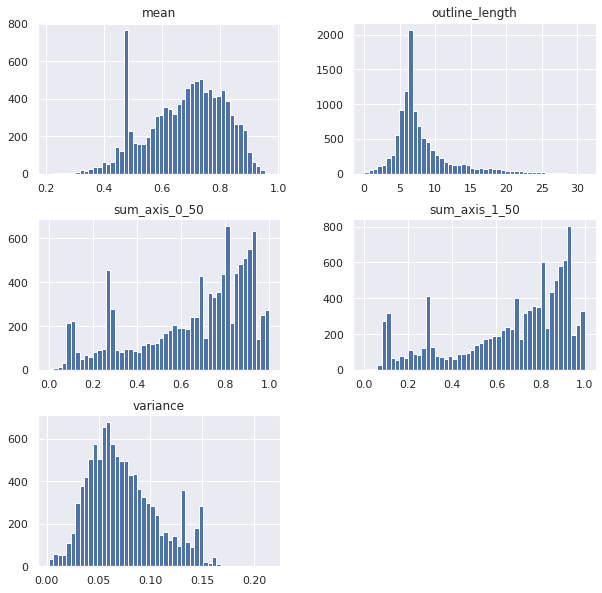

In [10]:
data[['sum_axis_0_50','sum_axis_1_50','mean','variance', 'outline_length']].hist(figsize=(10, 10), bins=50, layout=(3, 2));

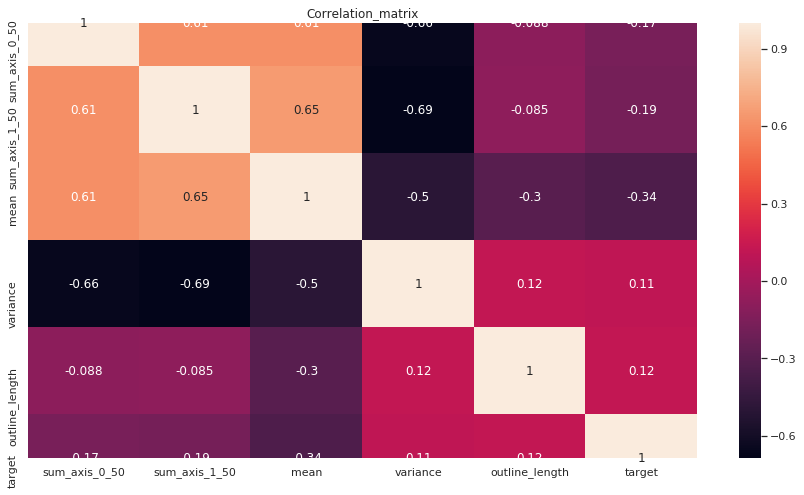

In [11]:
from sklearn import preprocessing
data_target = data.copy()
le = preprocessing.LabelEncoder()
data_target.target = le.fit_transform(data_target.target.values)
fig = plt.figure(figsize=(15,8))
sns.heatmap(data_target[['sum_axis_0_50','sum_axis_1_50','mean','variance','outline_length','target']].corr(), annot = True)
plt.title('Correlation_matrix')
plt.show()

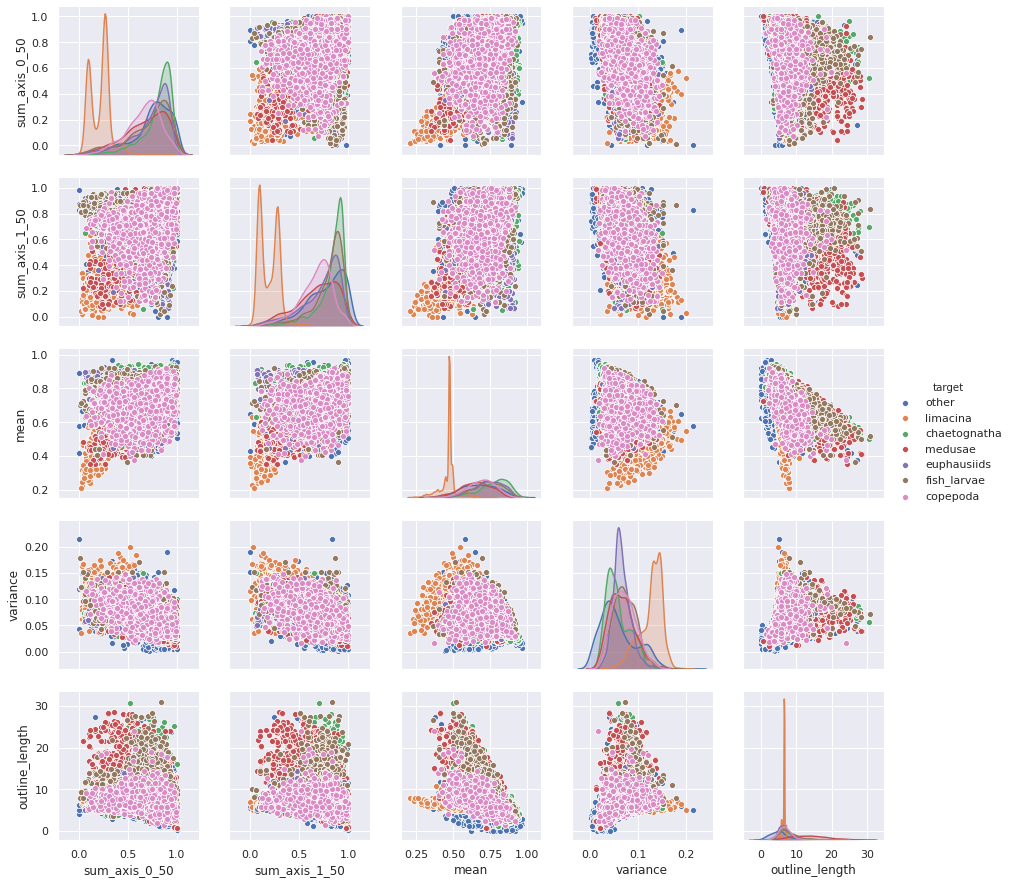

In [12]:
sns.pairplot(data,hue='target',vars=['sum_axis_0_50','sum_axis_1_50','mean','variance','outline_length'])
plt.show()

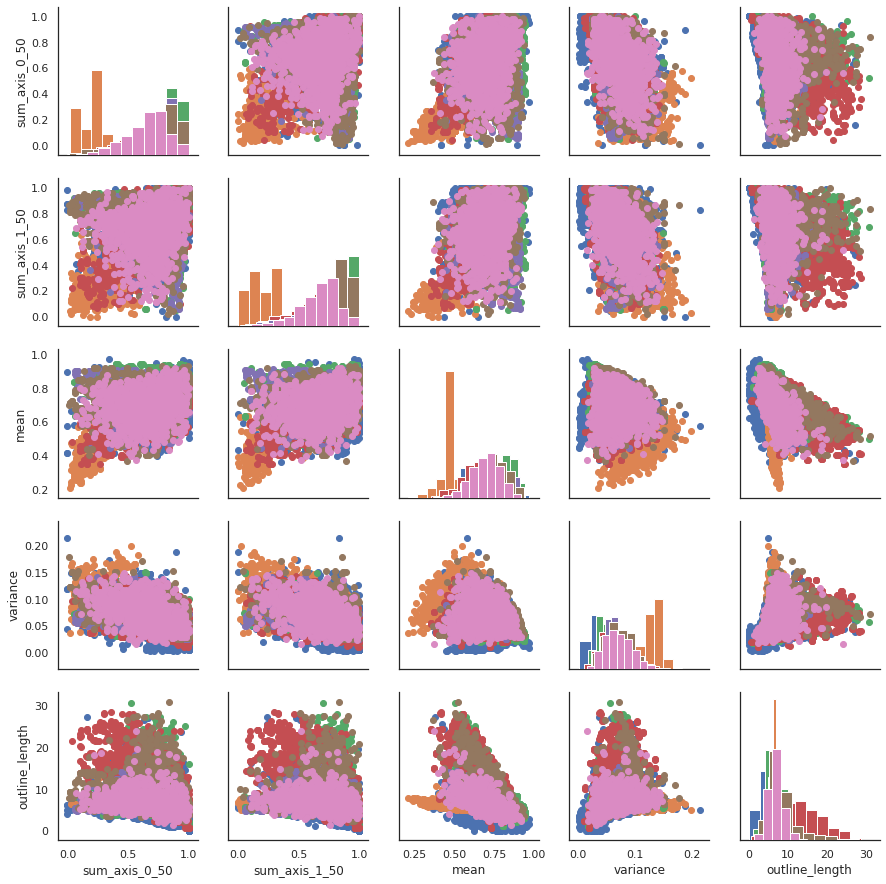

In [13]:
sns.set(style="white")
g = sns.PairGrid(data,hue='target', vars=['sum_axis_0_50','sum_axis_1_50','mean','variance','outline_length'])
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

In [14]:
#Les histogrammes se superposent les uns sur les autres et empêchent de bien voir certaines classes

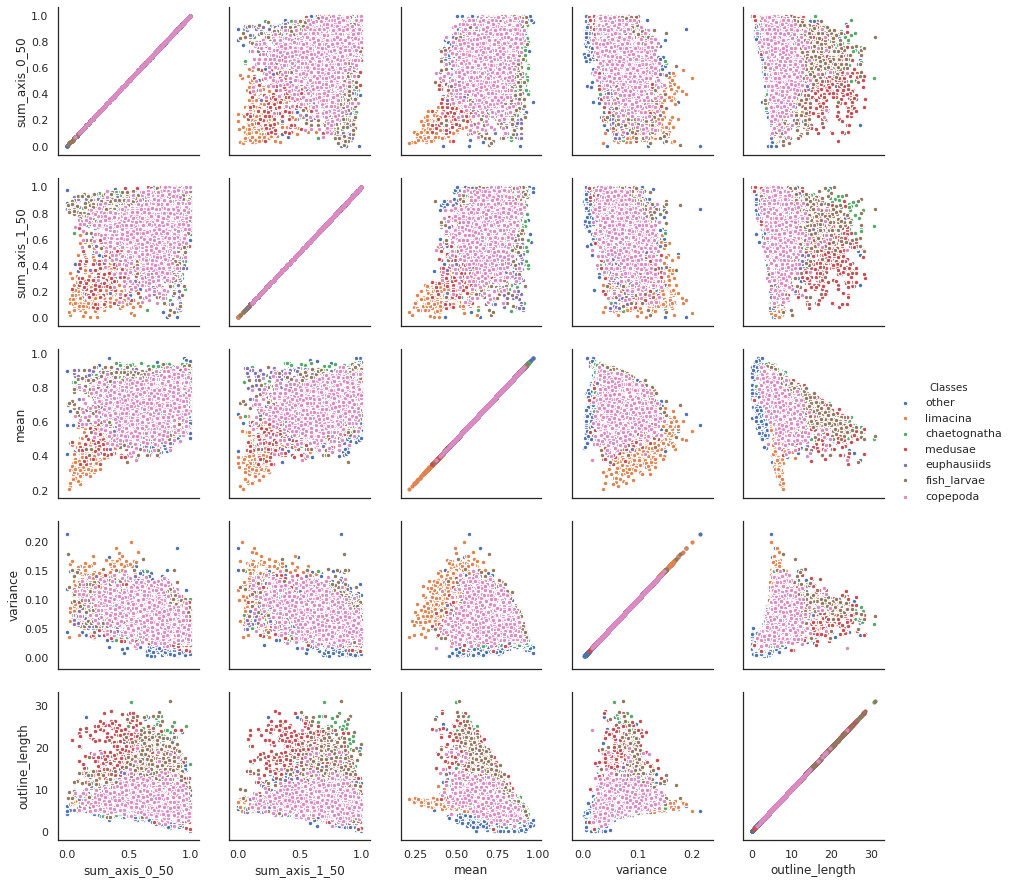

In [15]:
sns.set(style="white")
g = sns.PairGrid(data,hue='target', vars=['sum_axis_0_50','sum_axis_1_50','mean','variance','outline_length'])
g = g.map(plt.scatter, s=10)
g = g.map_offdiag(plt.scatter, edgecolor="w", s=20)
g = g.add_legend(title="Classes")

In [16]:
#La diagonale en ligne ne permet pas de bien voir les différentes classes mais les points sont plus lisibles
#leur taille réduite

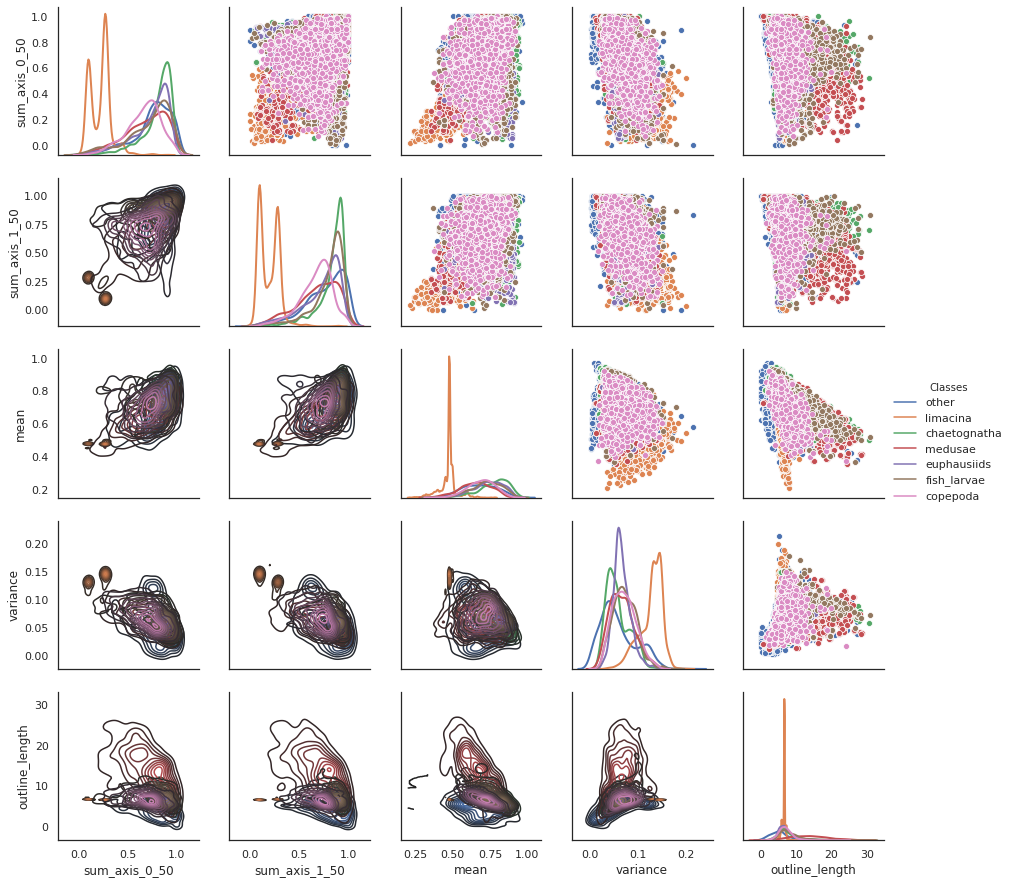

In [17]:
sns.set(style="white")
g = sns.PairGrid(data,hue='target', vars=['sum_axis_0_50','sum_axis_1_50','mean','variance','outline_length'],
                 diag_sharey=False)
g = g.map_upper(sns.scatterplot)
g = g.map_lower(sns.kdeplot)
g = g.map_diag(sns.kdeplot, lw=2)
g = g.add_legend(title="Classes")

In [18]:
#Avec cette représentation des données la partie sous la diagonale est dure à interpréter

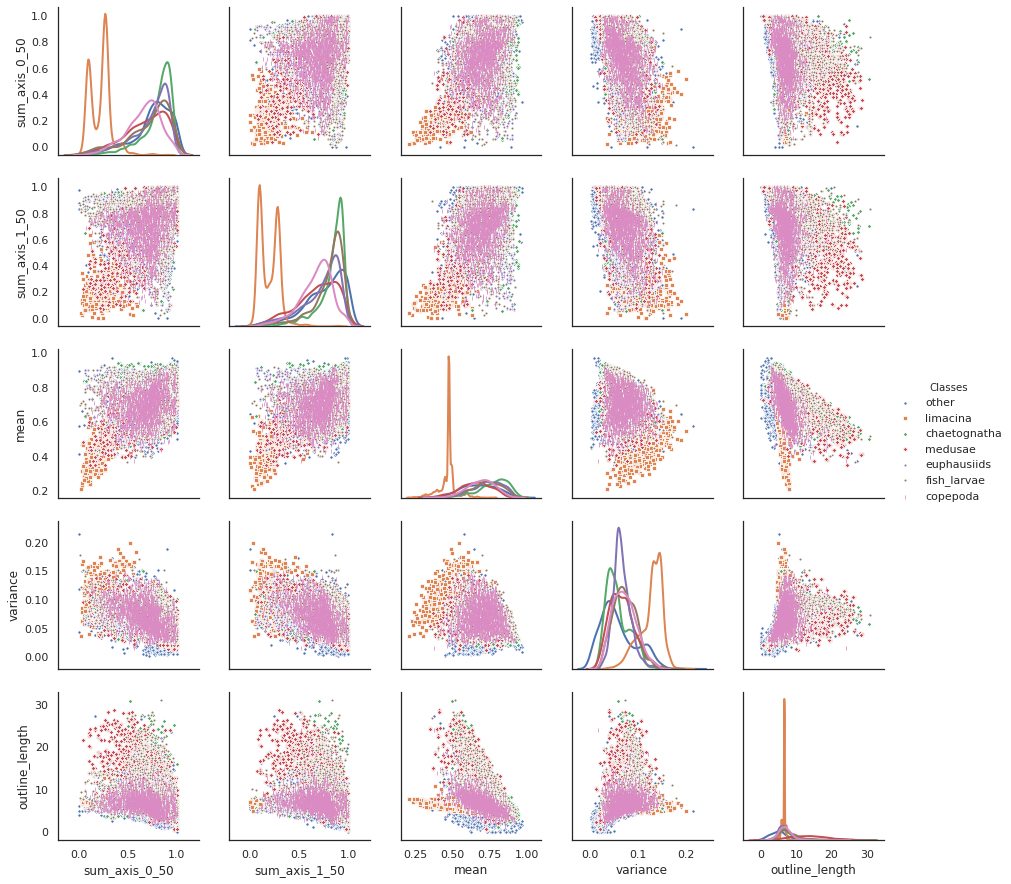

In [19]:
sns.set(style="white")
g = sns.PairGrid(data,hue='target', vars=['sum_axis_0_50','sum_axis_1_50','mean','variance','outline_length'],
                 hue_kws={"marker": ["o", "s", "D","P","h","H","|"]}, diag_sharey=False)
g = g.map_upper(sns.scatterplot, linewidths=1, edgecolor="w", s=10)
g = g.map_lower(sns.scatterplot, linewidths=1, edgecolor="w", s=10)
g = g.map_diag(sns.kdeplot, lw=2)
g = g.add_legend(title="Classes")

In [20]:
#Nous avons réduit la taille des points pour rendre les graphiques plus lisibles et mis des courbes sur la
#diagonale, c'est la représentation la plus claire 

<div style="background:cyan">
    <h1> First approach </h1>
<p>
We tried a first approach by visualizing the 7 classes of plankton according to three criteria: the pixel average, the variance and the length of the contours.
As we can see, the limacina class is strongly distinguished from the others mainly on the criteria of pixel average and length of contours
    <br>
    
</div>

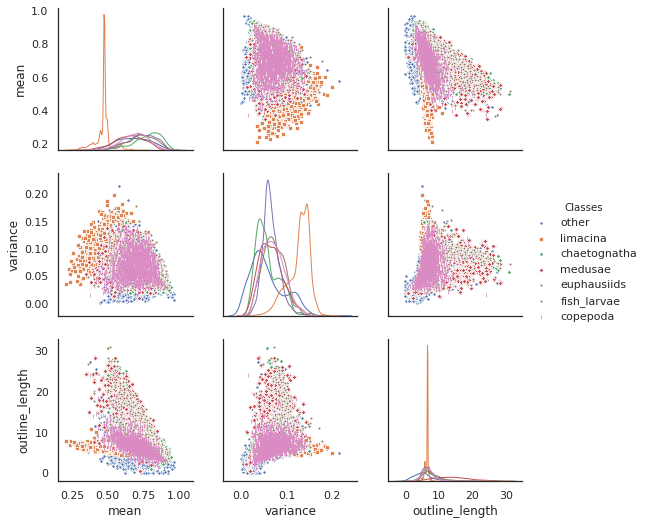

In [6]:
sns.set(style="white")
g = sns.PairGrid(data,hue='target', vars=['mean','variance','outline_length'],
                 hue_kws={"marker": ["o", "s", "D","P","h","H","|"]},diag_sharey=False)
g = g.map_upper(sns.scatterplot, linewidths=1, edgecolor="w", s=10)
g = g.map_lower(sns.scatterplot, linewidths=1, edgecolor="w", s=10)
g = g.map_diag(sns.kdeplot, lw=1)
g = g.add_legend(title='Classes')

<div style="background:#FFFFAA">
<h1>Step 2: Building a predictive model</h1>
</div>

<div style="background:#FFFFAA">
    <h2>Loading data with DataManager</h2>
    <p>
We reload the data with the AutoML DataManager class because this is more convenient:
</div>

In [5]:
from data_manager import DataManager
D = DataManager(data_name, data_dir, replace_missing=True)
print(D)

Info file found : /home/ugo/projects/PLANKTON/starting_kit/public_data/plankton_public.info
DataManager : plankton
info:
	usage = Sample dataset plankton data
	name = plankton
	task = multiclass.classification
	target_type = Numerical
	feat_type = Numerical
	metric = bac_metric
	time_budget = 1200
	feat_num = 202
	target_num = 7
	label_num = 7
	train_num = 10752
	valid_num = 3584
	test_num = 3584
	has_categorical = 0
	has_missing = 0
	is_sparse = 0
	format = dense
data:
	X_train = array(10752, 203)
	Y_train = array(10752, 1)
	X_valid = array(3584, 203)
	Y_valid = array(0,)
	X_test = array(3584, 203)
	Y_test = array(0,)
feat_type:	array(202,)
feat_idx:	array(0,)



<div style="background:cyan">
    <h1> Cluster visualization </h1>
<p>
We used the k-means algorithm to see the cluster in our data
    <br>
    
</div>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

"""
K-means function:
Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py
This function is used to visualize the clusters in our data using the k-means algorithm
---------------------------------------------------------
Args
    X: Training data array
    y: Training label array
    marker_settings = [marker_type, marker_size, marker_color]
    colors: color of the point for each different class
    title: title of the figure
    title_color: title's color
    title_size: title's size
    title_weight: normal or bold
----------------------------------------------------------
"""

def kmeans(X, y, marker_settings, colors, title, title_color, title_size, title_weight):
    
    data = scale(X)
    # We recover the numbers of features and data (pictures of different plankton)
    n_data, n_features = data.shape
    
    # We recover the number of classes
    n_classes = len(np.unique(y))
    print("n_classes: %d, \t n_data %d, \t n_features %d"% (n_classes, n_data, n_features))

    # We reduce the data dimension to 2 instead of 203 using PCA
    reduced_data = PCA(n_components=2).fit_transform(data)
    
    # We initialize the k-means
    kmeans = KMeans(init='k-means++', n_clusters=n_classes, n_init=7)
    
    # We train the k-means
    kmeans.fit(reduced_data)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    np.random.seed(42)
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # We recover the predicted label for each point
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
    # Plot the points: the argument 'k.' is used to plot the points with a shape of 'point', and not square for example
    for i, color in zip(range(n_classes), colors):
        idx = np.where(y == i)
        plt.plot(reduced_data[idx, 0], reduced_data[idx, 1], 'k.', markersize=2,color=color)
    # Plot the centroids
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], marker=marker_settings[0], s=marker_settings[1], linewidths=3, color=marker_settings[2], zorder=10)
    # We add the title and its settings
    plt.title(title, color=title_color, fontsize = title_size, fontweight=title_weight)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()
    

n_classes: 7, 	 n_data 10752, 	 n_features 203


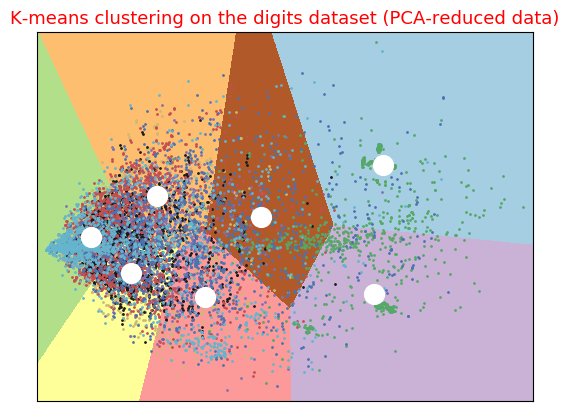

In [49]:
# K-means function
settings = ['o', 150, 'w']
kmeans(D.data['X_train'], D.data['Y_train'], settings, "ymkrgbc",
       'K-means clustering on the digits dataset (PCA-reduced data)', 'Red', 13, 'normal')

<div style="background:#FFFFAA">
    <h2>Training a predictive model</h2>
    <p>
We provide an example of predictive model (for classification or regression) in the `sample_code_submission/` directory. It is a quite stupid model: it makes constant predictions. Replace it with your own model.
    </div>

In [8]:
from data_io import write
from model import model

<div style="background:cyan">
<p>
We added the model chosen by <span style="color:red">Ramdane Mouloua</span> & <span style="color:red">Katia Fettat</span> of the model group.
The following function and the next cell were made by the model group and are available at this address:<br />
<a href="https://github.com/adblackx/PLANKTON/blob/master/starting_kit/README_MODEL.ipynb"> <b>https://github.com/adblackx/PLANKTON/blob/master/starting_kit/README_MODEL.ipynb</b></a>
</p>
    
</div>

In [9]:
def doBestModel(Model_final):
    """
    Runs the final model with best parameters 
    We then calculate the cross-validation and training performance    
    
    ----------
    Model_final: the best model with the best parameters


    Void
    ------
    show the CV score

    """

    M = Model_final
    if not(M.is_trained):
        M.fit(X_train, Y_train)
        
    trained_model_name = model_dir + data_name

    #Y_hat_train = M.predict(D.data['X_train']) # Optional, not really needed to test on training examples
    Y_hat_train = M.predict(D.data['X_train']) # Optional, not really needed to test on training examples
    Y_hat_valid = M.predict(D.data['X_valid'])
    Y_hat_test = M.predict(D.data['X_test'])


    M.save(trained_model_name)                 
    result_name = result_dir + data_name
    from data_io import write
    write(result_name + '_train.predict', Y_hat_train)
    write(result_name + '_valid.predict', Y_hat_valid)
    write(result_name + '_test.predict', Y_hat_test)
    !ls $result_name*

    metric_name, scoring_function = get_metric()
    scores = cross_val_score(M, X_train, Y_train, cv=5, scoring=make_scorer(scoring_function))
    print('Training train score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
    print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from libscores import get_metric
metric_name, scoring_function = get_metric()


X_train = D.data['X_train']
Y_train = D.data['Y_train']
Model_final = model(  RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0) )
#Model_final = model(  RandomForestClassifier(n_estimators=182, max_depth=None, min_samples_split=2, random_state=1) ) #also good parameters
doBestModel(Model_final)

FIT: dim(X)= [10752, 203]
FIT: dim(y)= [10752, 1]


sample_code_submission/model.py:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.classifier.fit(X,y)


PREDICT: dim(X)= [10752, 203]
PREDICT: dim(y)= [10752, 1]
PREDICT: dim(X)= [3584, 203]
PREDICT: dim(y)= [3584, 1]
PREDICT: dim(X)= [3584, 203]
PREDICT: dim(y)= [3584, 1]
sample_result_submission/plankton_test.predict
sample_result_submission/plankton_train.predict
sample_result_submission/plankton_valid.predict
FIT: dim(X)= [8601, 203]
FIT: dim(y)= [8601, 1]


sample_code_submission/model.py:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.classifier.fit(X,y)


PREDICT: dim(X)= [2151, 203]
PREDICT: dim(y)= [2151, 1]
FIT: dim(X)= [8601, 203]
FIT: dim(y)= [8601, 1]


sample_code_submission/model.py:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.classifier.fit(X,y)


PREDICT: dim(X)= [2151, 203]
PREDICT: dim(y)= [2151, 1]
FIT: dim(X)= [8602, 203]
FIT: dim(y)= [8602, 1]


sample_code_submission/model.py:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.classifier.fit(X,y)


PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
FIT: dim(X)= [8602, 203]
FIT: dim(y)= [8602, 1]


sample_code_submission/model.py:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.classifier.fit(X,y)


PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
FIT: dim(X)= [8602, 203]
FIT: dim(y)= [8602, 1]


sample_code_submission/model.py:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.classifier.fit(X,y)


PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
Training train score for the balanced_accuracy_score metric = 0.9998

CV score (95 perc. CI): 0.78 (+/- 0.01)


<div style="background:#FFFFAA">
an instance of the model (run the constructor) and attempt to reload a previously saved version from `sample_code_submission/`:
    
</div>

In [11]:
# uncomment the desired model

# Decision tree model
from sklearn.tree import DecisionTreeClassifier
M = model(classifier=DecisionTreeClassifier(max_depth=10, max_features = 'sqrt',random_state=42))

trained_model_name = model_dir + data_name

# Uncomment the next line to re-load an already trained model
#M = model()
#M = M.load(trained_model_name)                  

<div style="background:#FFFFAA">
    Train the model (unless you reloaded a trained model) and make predictions. 
</div>

In [12]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']

if not(M.is_trained):
    M.fit(X_train, Y_train.ravel())
    print('training')

Y_hat_train_m1 = M.predict(D.data['X_train']) # Optional, not really needed to test on training examples
Y_hat_valid_m1 = M.predict(D.data['X_valid'])
Y_hat_test_m1 = M.predict(D.data['X_test'])

if not(Model_final.is_trained):
    Model_final.fit(X_train, Y_train)
    print('training')

Y_hat_train = Model_final.predict(D.data['X_train']) # Optional, not really needed to test on training examples
Y_hat_valid = Model_final.predict(D.data['X_valid'])
Y_hat_test = Model_final.predict(D.data['X_test'])


FIT: dim(X)= [10752, 203]
FIT: dim(y)= [10752, 1]
training
PREDICT: dim(X)= [10752, 203]
PREDICT: dim(y)= [10752, 1]
PREDICT: dim(X)= [3584, 203]
PREDICT: dim(y)= [3584, 1]
PREDICT: dim(X)= [3584, 203]
PREDICT: dim(y)= [3584, 1]
PREDICT: dim(X)= [10752, 203]
PREDICT: dim(y)= [10752, 1]
PREDICT: dim(X)= [3584, 203]
PREDICT: dim(y)= [3584, 1]
PREDICT: dim(X)= [3584, 203]
PREDICT: dim(y)= [3584, 1]


<div style="background:#FFFFAA">
    <b> Save the trained model </b> (will be ready to reload next time around) and save the prediction results. IMPORTANT: if you save the trained model, it will be bundled with your sample code submission. Therefore your model will NOT be retrained on the challenge platform. Remove the pickle from the submission if you want the model to be retrained on the platform.
</div>

In [13]:
#M.save(trained_model_name)                 
#result_name = result_dir + data_name
#from data_io import write
#write(result_name + '_train.predict', Y_hat_train)
#write(result_name + '_valid.predict', Y_hat_valid)
#write(result_name + '_test.predict', Y_hat_test)
#!ls $result_name*

<div style="background:#FFFFAA">
    <h2>Scoring the results</h2>
    <h3>Load the challenge metric</h3>
    <p>
<b>The metric chosen for your challenge</b> is identified in the "metric.txt" file found in the `scoring_function/` directory. The function "get_metric" searches first for a metric having that name in my_metric.py, then in libscores.py, then in sklearn.metric.
    </div>

<div style="background:#FFFFAA">
The chosen metric is the balanced accuracy. It computes the proportion of elements correctly predicted for each class. It then returns the mean of these values. The advantage of this metric is that every class is given an equal weight. <br> In our case, since all the classes are perfectly balanced, it is equivalent to simply computing the accuracy score but it the case the test set is changed and is no longer balanced, the balanced accuracy will still work properly while the accuracy score will not.
</div>

In [14]:
#from libscores import get_metric
#metric_name, scoring_function = get_metric()
#print('Using scoring metric:', metric_name)
# Uncomment the next line to display the code of the scoring metric
#??scoring_function

<div style="background:#FFFFAA">
    <h3> Training performance </h3>
    <p>
The participants normally posess target values (labels) only for training examples (except for the sample data). We compute with the `example` metric the training score, which should be zero for perfect predictions.
        </div>

In [15]:
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train))

Training score for the balanced_accuracy_score metric = 0.9998
Ideal score for the balanced_accuracy_score metric = 1.0000


You can add here other scores and result visualization.

<div style="background:cyan">
    <h1> Confusion Matrix</h1>
<p>
We display the confusion matrix showing the results of the initial model on the training set in blue and those of the final model in purple
    <br>
    
</div>

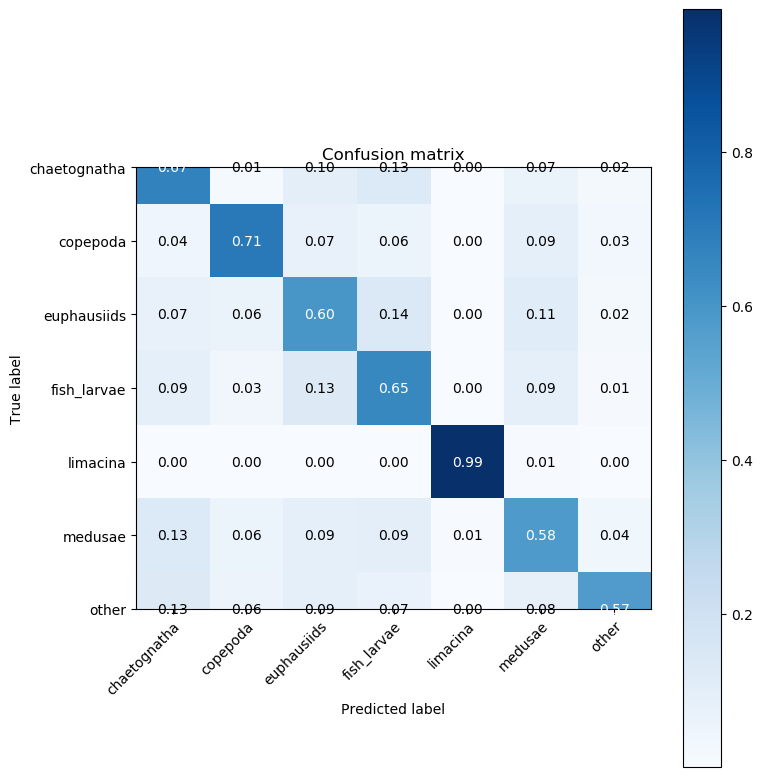

In [16]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')
labels = ["chaetognatha","copepoda","euphausiids","fish_larvae","limacina","medusae","other"]
cm = confusion_matrix(Y_train, Y_hat_train_m1)
cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),yticks=np.arange(cm.shape[0]),xticklabels=labels,yticklabels=labels,title="Confusion matrix",xlabel="Predicted label",ylabel="True label")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
fmt = '.2f'
thresh = cm.max()/2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()

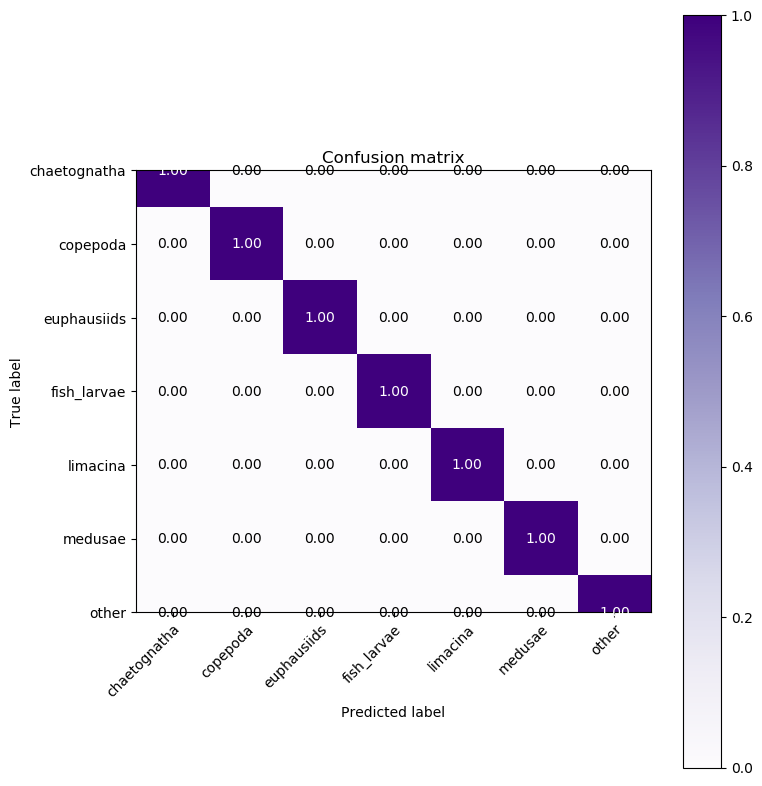

In [17]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')
labels = ["chaetognatha","copepoda","euphausiids","fish_larvae","limacina","medusae","other"]
cm = confusion_matrix(Y_train, Y_hat_train)
cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(cm, interpolation='nearest',cmap=plt.cm.Purples)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),yticks=np.arange(cm.shape[0]),xticklabels=labels,yticklabels=labels,title="Confusion matrix",xlabel="Predicted label",ylabel="True label")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
fmt = '.2f'
thresh = cm.max()/2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()

<div style="background:cyan">
<p>
We see that there is a lot of error on the training set for the initial model, only the limacina class has a very good score while for the final model we get a perfect score on the training set
</p>
</div>


<div style="background:cyan">
    <h1> Error predict visualization </h1>
<p>
We used the decision surface algorithm to be able to see the error prediction made by a classifier
    <br>
    
</div>

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

"""
Decision surface function:
Source: https://scikit-learn.org/0.15/auto_examples/tree/plot_iris.html
This function is used to plot the decision surface of a classifier, the decision surface is a good way
to see the efficiancy of a classifier
------------------------------------------------------------------
Args
    X: Training data array
    y: Training label array
    colors: Color of the point for each different class
    classes_names: Array which contains the names of the classes
    Classifier: The classifier used
    title: Title of the figure
    title_color: Title's color
    title_size: Title's size
    title_weight: Normal or bold
-------------------------------------------------------------------
"""

def decision_surface(X, y, colors, classes_names, Classifier, title, title_color, title_size, title_weight):
    
    #We recover the number of classes
    classes_number = len(np.unique(y))
    
    # We reduce the data dimension to 2 instead of 203 using PCA
    X = PCA(n_components=2).fit_transform(scale(X))
    reduced_data = X

    # We train our classifier
    clf = Classifier.fit(reduced_data, y)
    
    # Plot the decision boundary
    plt.subplot()
    plot_step = 0.02
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

    # We recover the predicted label by the classifier
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the background's colors
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
   
    # Plot the training points with the color of its class
    for i, color in zip(range(classes_number), colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=classes_names[i], s=3, cmap=plt.cm.Paired) 
    
    # We add the title and its settings
    plt.axis("tight")
    plt.suptitle(title, color=title_color, fontsize=title_size, fontweight=title_weight)
    plt.legend(title='Classes',bbox_to_anchor=(1.2,0.5,0.25,0.),loc=5)
    plt.show()

<div style="background:cyan">
<p>We execute the decision_surface function with the following classifiers:
    <ul>
        <li>Decision Tree
        <li>MLP
        <li>KNeighbors
        <li>AdaBoost
        <li>GaussianNB
        <li>QuadraticDiscriminantAnalysis
        <li>ExtraTrees
    </ul>
We did not set the hyperparameters to get a first overview of their decision area.
</p>
</div>

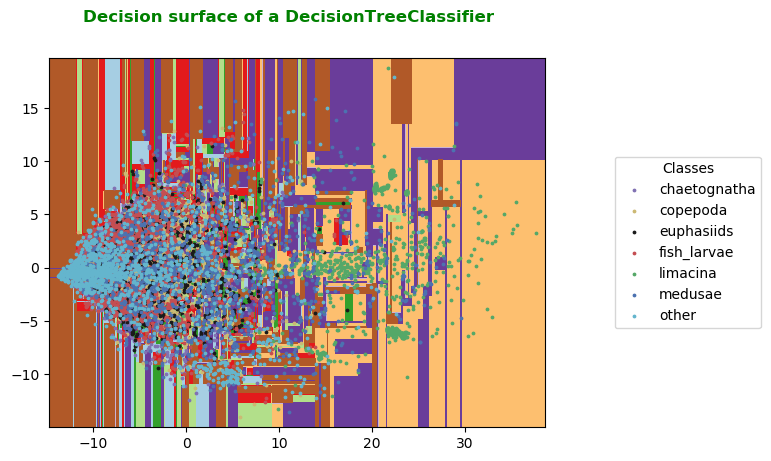

In [19]:
# Decision surface function
classes_names = ["chaetognatha","copepoda","euphasiids","fish_larvae","limacina","medusae","other"]

decision_surface(X_train, Y_train, "mykrgbc", classes_names, DecisionTreeClassifier(),
                 'Decision surface of a DecisionTreeClassifier', 'Green', 12, 'bold')
    

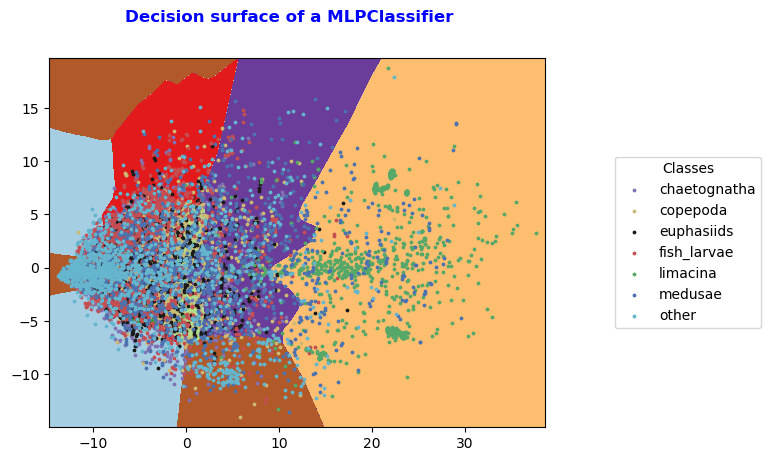

In [75]:
decision_surface(X_train, Y_train.ravel(), "mykrgbc", classes_names, MLPClassifier(),
                 'Decision surface of a MLPClassifier', 'Blue', 12, 'bold')

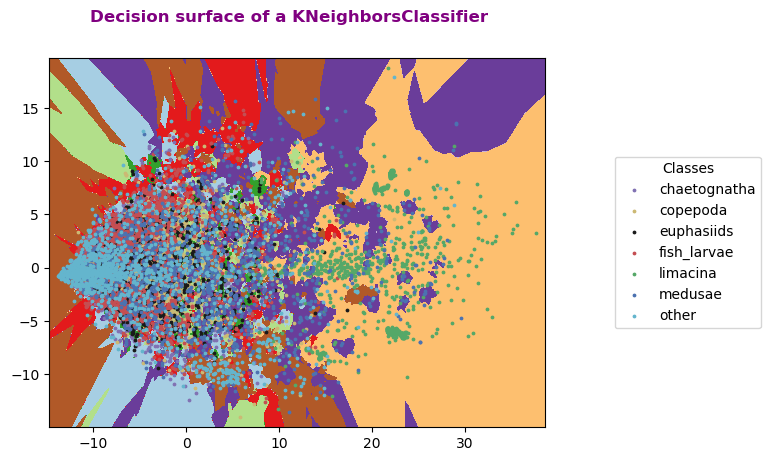

In [41]:
decision_surface(X_train, Y_train.ravel(), "mykrgbc", classes_names, KNeighborsClassifier(),
                 'Decision surface of a KNeighborsClassifier', 'Purple', 12, 'bold')

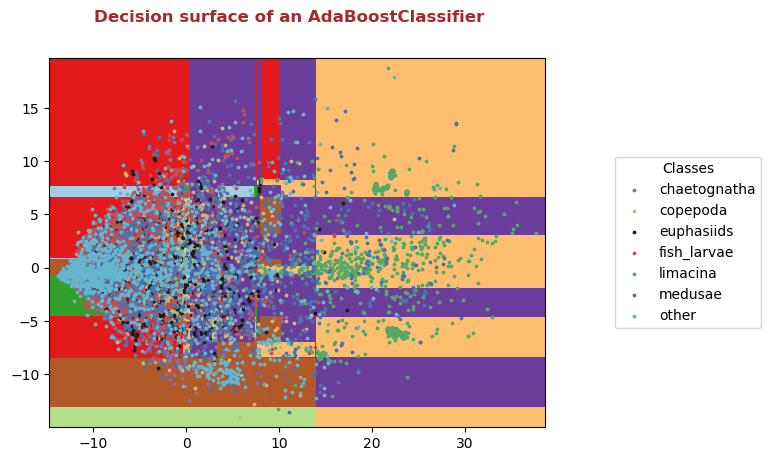

In [43]:
decision_surface(X_train, Y_train.ravel(), "mykrgbc", classes_names, AdaBoostClassifier(),
                 'Decision surface of an AdaBoostClassifier', 'Brown', 12, 'bold')

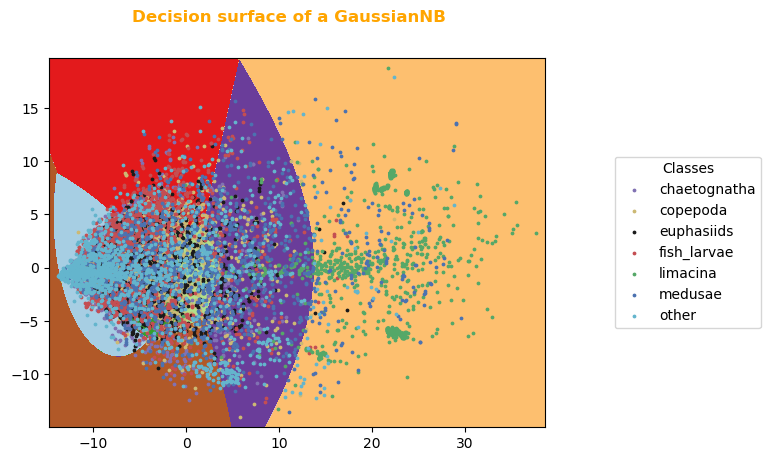

In [44]:
decision_surface(X_train, Y_train.ravel(), "mykrgbc", classes_names, GaussianNB(),
                 'Decision surface of a GaussianNB', 'Orange', 12, 'bold')

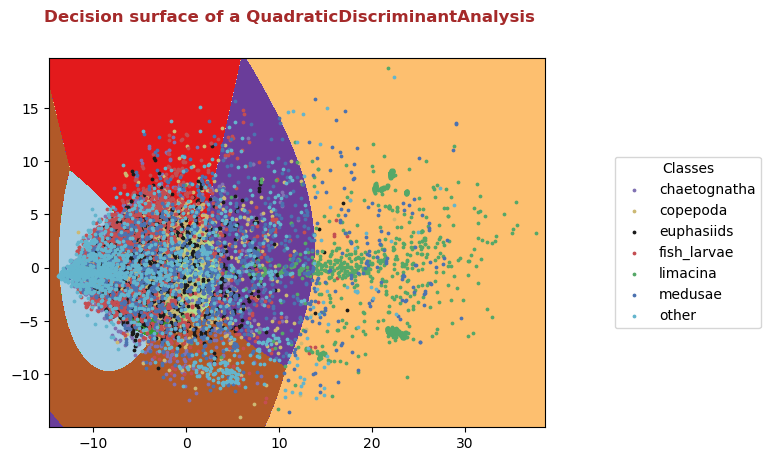

In [45]:
decision_surface(X_train, Y_train.ravel(), "mykrgbc", classes_names, QuadraticDiscriminantAnalysis(),
                 'Decision surface of a QuadraticDiscriminantAnalysis', 'Brown', 12, 'bold')

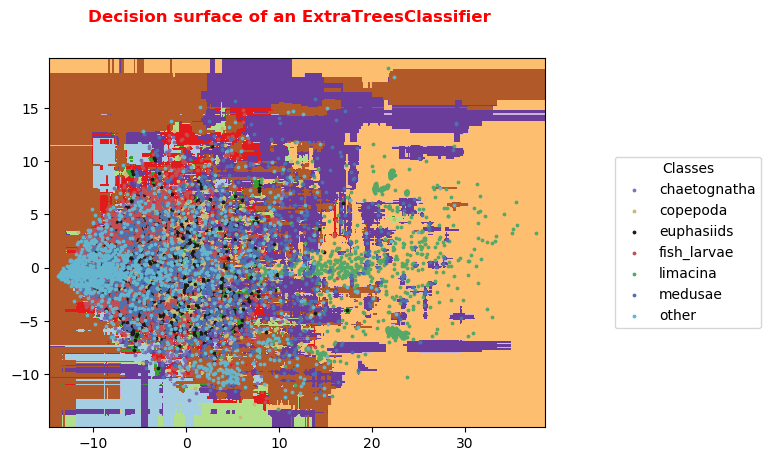

In [46]:
decision_surface(X_train, Y_train.ravel(), "mykrgbc", classes_names, ExtraTreesClassifier(),
                 'Decision surface of an ExtraTreesClassifier', 'Red', 12, 'bold')

<div style="background:cyan">
<p>The classifier selected by the model group is the RandomForestClassifier, we now compare the decision surface obtained when we do not adjust the hyperparameters and when we use the optimal parameters found by the model group.
</p>
</div>


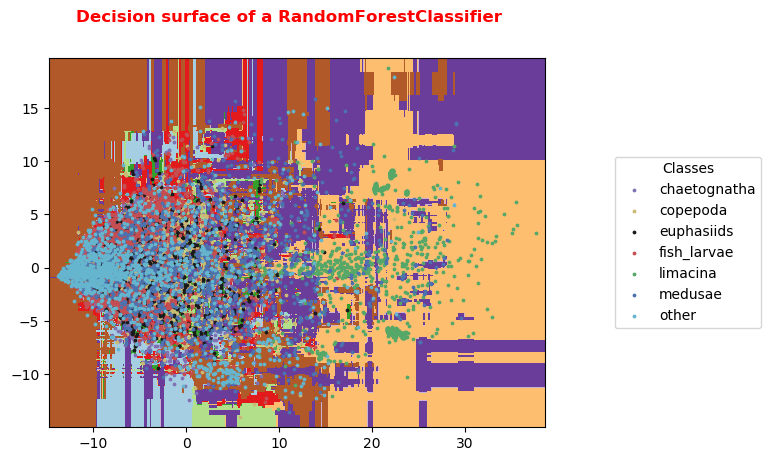

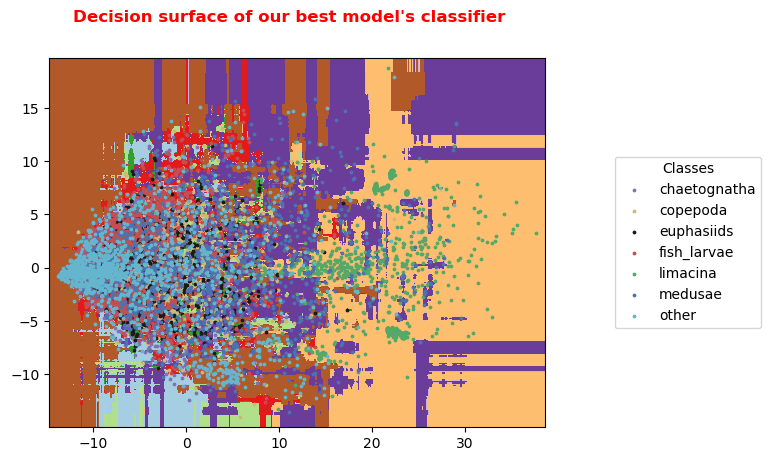

In [50]:
decision_surface(X_train, Y_hat_train.ravel(), "mykrgbc", classes_names, RandomForestClassifier(),
                 'Decision surface of a RandomForestClassifier', 'Red', 12, 'bold')

decision_surface(X_train, Y_hat_train.ravel(), "mykrgbc", classes_names, Model_final.classifier,
                 'Decision surface of our best model\'s classifier', 'Red', 12, 'bold')

<div style="background:cyan">
<p>
We see that there is a lot of error on the training set for the initial model, only the limacina class has a very good score while for the final model we get a perfect score on the training set.
At first sight the result does not seem very different but if we look closely we see that the result is much better because many errors have been corrected
</p>
</div>


<div style="background:#FFFFAA">
    <h3>Cross-validation performance</h3>
    <p>
The participants do not have access to the labels Y_valid and Y_test to self-assess their validation and test performances. But training performance is not a good prediction of validation or test performance. Using cross-validation, the training data is split into multiple training/test folds, which allows participants to self-assess their model during development. The average CV result and 95% confidence interval is displayed.
   </div>

In [20]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
scoresInit = cross_val_score(M, X_train, Y_train, cv=5, scoring=make_scorer(scoring_function))
scoresBestModel = cross_val_score(Model_final, X_train, Y_train.ravel(), cv=5, scoring=make_scorer(scoring_function))
print('\nCV scoreInit (95 perc. CI): %0.2f (+/- %0.2f)' % (scoresInit.mean(), scoresInit.std() * 2))
print('\nCV scoreBestModel (95 perc. CI): %0.2f (+/- %0.2f)' % (scoresBestModel.mean(), scoresBestModel.std() * 2))

FIT: dim(X)= [8601, 203]
FIT: dim(y)= [8601, 1]
PREDICT: dim(X)= [2151, 203]
PREDICT: dim(y)= [2151, 1]
FIT: dim(X)= [8601, 203]
FIT: dim(y)= [8601, 1]
PREDICT: dim(X)= [2151, 203]
PREDICT: dim(y)= [2151, 1]
FIT: dim(X)= [8602, 203]
FIT: dim(y)= [8602, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
FIT: dim(X)= [8602, 203]
FIT: dim(y)= [8602, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
FIT: dim(X)= [8602, 203]
FIT: dim(y)= [8602, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
FIT: dim(X)= [8601, 203]
FIT: dim(y)= [8601, 1]
PREDICT: dim(X)= [2151, 203]
PREDICT: dim(y)= [2151, 1]
FIT: dim(X)= [8601, 203]
FIT: dim(y)= [8601, 1]
PREDICT: dim(X)= [2151, 203]
PREDICT: dim(y)= [2151, 1]
FIT: dim(X)= [8602, 203]
FIT: dim(y)= [8602, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
FIT: dim(X)= [8602, 203]
FIT: dim(y)= [8602, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
FIT: dim(X)= [8602, 203]
FIT: dim(y)= [8602, 1]
PREDICT: dim(X)=

<div style="background:cyan">
    <h1> Cross-validation </h1>
    <p>
        Cross-validation allows us to find the best cutting configuration for our dataset. For this cross-validation will drive our model on several possible cuts of the training set, the function plot_cross_validation allows us to visualize the scores obtained depending on the breakdown carried out.
    </p>    
</div>

In [21]:
"""
Cross-validation plot function:
This function is used to plot the cross-validation's graph
---------------------------------------------------------------
Args
    score: Array which contains the cross-validation score
    settings: [curve_color, marker_type, marker_size, marker_color]
    title: Title of the figure
    title_color: Title's color
    title_size: Title's size
    title_weight: Normal or bold
-----------------------------------------------------------------
"""

def plot_cross_validation(scores, settings, title, title_color, title_size, title_weight):
    # Plot the figure
    plt.plot(scores, color=settings[0], marker=settings[1], markersize=settings[2], MarkerFaceColor=settings[3],
             MarkerEdgeColor="Black")
    # We add the name of the axis
    plt.ylabel('Score')
    plt.xlabel('(x-ieme +1) cross validation')
    # We add the title and it's settings
    plt.title(title, color=title_color, fontsize = title_size, fontweight=title_weight)
    plt.show()

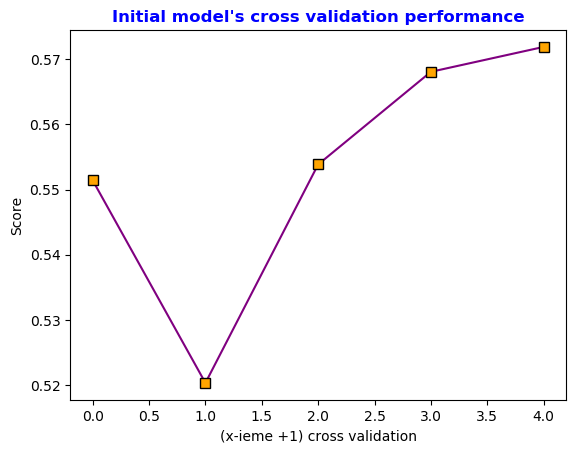

In [22]:
# Cross-validation plot function
settings = ['Purple', 's', 7, 'Orange']
plot_cross_validation(scoresInit, settings, 'Initial model\'s cross validation performance', 'Blue', 12, 'bold')

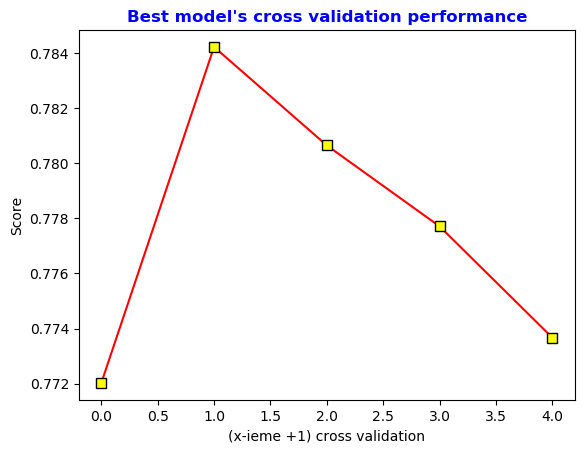

In [23]:
settings = ['Red', 's', 7, 'Yellow']
plot_cross_validation(scoresBestModel, settings, 'Best model\'s cross validation performance', 'Blue', 12, 'bold')

<div style="background:cyan">
  <p>
      Cross-validation was done by dividing the training set into 5 parts.
      We see that there is a drop between the first cross validation split and the second in the first figure. This means that the first cross-validation split is better than the second. Then from the second the curve is strictly increasing, which indicates that the best cross validation split is the 5th. <br>
   In the second figure, we see that the highest score is obtained on the 2nd cross-validation split also, then the score decreases on the others. <br>
      This means that the 2nd cross-validation fold is the best
    </p>
</div>

<div style="background:cyan">
    <h1> Model performance visualization </h1>
    In this section we plot the results to assess the effectiveness of a model
    </ul>    
</div>

In [79]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
"""
Model's performance function:
This function is used to obtain the model's performance
Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
---------------------------------------------------------------
Args
    X: Training data array
    y: Training label array
    training_size: Array which contains the different values of the training set size
    M: model
    scoring_function: metric
    train_test : 'train', 'test' or 'train_test', indicates for which set we want the performance, if it's
                'train_test' then we get the performance for both set
---------------------------------------------------------------
"""

def model_performance(X, y, training_size, M, scoring_function):
    train_sizes, train_scores, test_scores = learning_curve(M, X, y, train_sizes = training_size,
                                                        cv=5, scoring=make_scorer(scoring_function),shuffle=True)
    scores = []
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_error = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_error = np.std(test_scores, axis=1)
    scores = [train_scores_mean, train_scores_error, test_scores_mean, test_scores_error]
    return scores

"""
Plot performance function:
This function is used to plot the model's performance with errors bars
-----------------------------------------------------------------------
Args
    training_size: Array which contains the different values of the training set size, it has to be the same as
                    you used for the function model_performance
    performance: values of y axis, it correspond to the result of the function model_performance
    settings: [curve_color, marker_type, marker_size, marker_color]
    title: Title of the figure
    title_color: Title's color
    title_size: Title's size
    title_weight: Normal or bold
-----------------------------------------------------------------------
"""

def plot_performance(training_size, performance, settings, title, title_color, title_size, title_weight,
                     train_test):
    # Plot the model's performance with errors bars
    if(train_test == 'train'):
        plt.errorbar(training_size, performance[0], performance[1], color=settings[0], marker=settings[1],
                 markersize=settings[2], MarkerFaceColor=settings[3], MarkerEdgeColor="Black")
    elif(train_test == 'test'):
        plt.errorbar(training_size, performance[2], performance[3], color=settings[0], marker=settings[1],
                 markersize=settings[2], MarkerFaceColor=settings[3], MarkerEdgeColor="Black")
    # We add the name of the axis
    plt.xlabel("Training set size")
    plt.ylabel("Performance (score)")
    # We add the title and it's settings
    plt.title(title, color=title_color, fontsize=title_size, fontweight=title_weight)
    plt.show()
    
"""
Performance's comparison function:
This function is ony used in the compare_models_performance function
---------------------------------------------------------------
Args
    X: Training data array
    y: Training label array
    training_size: Array which contains the different values of the training set size
    model_tab: Array which contains the two models to compare
    scoring_function: metric
    n_times: How many times you want to run the learning_curve function
---------------------------------------------------------------
"""
def performance_comparison(X, y, training_size, model_tab, scoring_function, n_times):
    perf = []
    for i in range(n_times):
        perf.append([])
    # Calculate the score
    for k in range(len(model_tab)):
        for i in range(n_times):
            train_sizes, train_scores, test_scores = learning_curve(model_tab[k], X, y,
                                                                    train_sizes = training_size,
                                                        cv=5, scoring=make_scorer(scoring_function),shuffle=True)
            train_scores_mean = np.mean(train_scores, axis=1)
            test_scores_mean = np.mean(test_scores, axis=1)
            perf[k].append(train_scores_mean)
            perf[k].append(test_scores_mean)
    return perf

"""
Compare models performance function:
This function is used to compare the performance between two models
---------------------------------------------------------------
Args
    model_1: First model
    model_2: Second model
    training_size: Array which contains the different values of the training set size
    X: Training data array
    y: Training label array
    scoring_function: metric
    n_times: How many times you want to run the learning_curve function
---------------------------------------------------------------
"""
def compare_models_performance(model_1, model_2, training_size, X, y, scoring_function, n_times):
    #Calculate the performance with error bar for each model for the train & test set
    model_1_score = model_performance(X, y, training_size, model_1, scoring_function)
    model_2_score = model_performance(X, y, training_size, model_2, scoring_function)
    
    #Calculate the perf n_times times for each model
    model_tab = [model_1, model_2]
    perf = performance_comparison(X, y, training_size, model_tab, scoring_function, n_times)
    
    #Calculate the score difference
    score_diff_train = model_1_score[0] - model_2_score[0]
    score_diff_test = model_1_score[2] - model_2_score[2]
    score_diff_train = abs(score_diff_train)
    score_diff_test = abs(score_diff_test)
    res = [[model_1_score, model_2_score], perf, [score_diff_train, score_diff_test]]
    return res

"""
Plot model comparizon function:
This function is used to plot the figure representing the comparizon between two models's performance
---------------------------------------------------------------
Args
    performance: Array which contains all the information needed to do the plot, we obtain it with the
                compare_models_performance function
    training_size: Array which contains the different values of the training set size
    size: dimension of the figure (size*size)
    firstModelName: Name of the first model
    scdModelName : Name of the second model
---------------------------------------------------------------
"""
def plot_model_comparison(performance, training_size, size, firstModelName, scdModelName):
    fig = plt.figure(figsize = (size,size),tight_layout=True)
    gs = gridspec.GridSpec(3, 2)
    #n_times
    ax = fig.add_subplot(gs[0, :])
    j = 0
    model_1_color = ['blue', 'cyan', 'yellow', 'gold']
    model_2_color = ['blue', 'cyan', 'yellow', 'gold']
    for i in range(int(len(performance[1][0])/2)):
        if(i==0):
            ax.plot(training_size,performance[1][0][j],linestyle=':',color='blue',label=firstModelName+'_train')
            ax.plot(training_size,performance[1][0][j+1],linestyle='--',color='lime',label=firstModelName+'_test')
            ax.plot(training_size,performance[1][1][j],linestyle=':',color='red',label=scdModelName+'_train')
            ax.plot(training_size,performance[1][1][j+1],linestyle='--',color='gold',label=scdModelName+'_test')
        else:
            ax.plot(training_size,performance[1][0][j],linestyle=':',color='blue')
            ax.plot(training_size,performance[1][0][j+1],linestyle='--',color='lime')
            ax.plot(training_size,performance[1][1][j],linestyle=':',color='red')
            ax.plot(training_size,performance[1][1][j+1],linestyle='--',color='gold')  
        j = j+2
    ax.legend()  
    ax.set_title('Models\'s performances on the training set and test set according to the size of the training set',
                fontsize=9)
    ax.set_ylabel('Score')
    ax.set_xlabel('Training set size')

    #model_1
    ax = fig.add_subplot(gs[1, 0])
    ax.errorbar(training_size, performance[0][0][0], performance[0][0][1], color='blue', marker='o',
                 markersize=4, MarkerFaceColor='lime', MarkerEdgeColor="Black",label='train')
    ax.errorbar(training_size, performance[0][0][2], performance[0][0][3], color='lime', marker='o',
                 markersize=4, MarkerFaceColor='blue', MarkerEdgeColor="Black",label='test')
    ax.legend()
    ax.set_title(firstModelName)
    ax.set_ylabel('Score')
    ax.set_xlabel('Training set size')
    #model_2   
    ax = fig.add_subplot(gs[1, 1])
    ax.errorbar(training_size, performance[0][1][0], performance[0][1][1], color='Red', marker='o',
                 markersize=4, MarkerFaceColor='gold', MarkerEdgeColor="Black",label='train')
    ax.errorbar(training_size, performance[0][1][2], performance[0][1][3], color='gold', marker='o',
                 markersize=4, MarkerFaceColor='red', MarkerEdgeColor="Black",label='test')
    ax.legend(loc=4)
    ax.set_title(scdModelName)
    ax.set_ylabel('Score')
    ax.set_xlabel('Training set size')
    #Score_diff
    ax = fig.add_subplot(gs[2, :])
    ax.plot(training_size, performance[2][0], label='train',color='magenta', marker='p',MarkerFaceColor='orange',
            MarkerEdgeColor='black')
    ax.plot(training_size, performance[2][1], label='test', color='orange', marker='p',MarkerFaceColor='magenta',
            MarkerEdgeColor='black')
    ax.legend()
    ax.set_title('Score difference between the two models for the training set and the test set',fontsize=9)
    ax.set_ylabel('Score difference')
    ax.set_xlabel('Training set size')
    fig.align_labels()  
    plt.show()

In [33]:
# First we use the model_performance function to obtain the model's performance
t = [100, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 8601]

perfInitModel_1 = model_performance(X_train, Y_train.ravel(), t, M, scoring_function)
perfInitModel_2 = model_performance(X_train, Y_train.ravel(), t, M, scoring_function)
perfFinalModel = model_performance(X_train, Y_train.ravel(), t, Model_final, scoring_function)

FIT: dim(X)= [100, 203]
FIT: dim(y)= [100, 1]
PREDICT: dim(X)= [2151, 203]
PREDICT: dim(y)= [2151, 1]
PREDICT: dim(X)= [100, 203]
PREDICT: dim(y)= [100, 1]
FIT: dim(X)= [500, 203]
FIT: dim(y)= [500, 1]
PREDICT: dim(X)= [2151, 203]
PREDICT: dim(y)= [2151, 1]
PREDICT: dim(X)= [500, 203]
PREDICT: dim(y)= [500, 1]
FIT: dim(X)= [1000, 203]
FIT: dim(y)= [1000, 1]
PREDICT: dim(X)= [2151, 203]
PREDICT: dim(y)= [2151, 1]
PREDICT: dim(X)= [1000, 203]
PREDICT: dim(y)= [1000, 1]
FIT: dim(X)= [2000, 203]
FIT: dim(y)= [2000, 1]
PREDICT: dim(X)= [2151, 203]
PREDICT: dim(y)= [2151, 1]
PREDICT: dim(X)= [2000, 203]
PREDICT: dim(y)= [2000, 1]
FIT: dim(X)= [3000, 203]
FIT: dim(y)= [3000, 1]
PREDICT: dim(X)= [2151, 203]
PREDICT: dim(y)= [2151, 1]
PREDICT: dim(X)= [3000, 203]
PREDICT: dim(y)= [3000, 1]
FIT: dim(X)= [4000, 203]
FIT: dim(y)= [4000, 1]
PREDICT: dim(X)= [2151, 203]
PREDICT: dim(y)= [2151, 1]
PREDICT: dim(X)= [4000, 203]
PREDICT: dim(y)= [4000, 1]
FIT: dim(X)= [5000, 203]
FIT: dim(y)= [5000, 1]


PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [7000, 203]
PREDICT: dim(y)= [7000, 1]
FIT: dim(X)= [8000, 203]
FIT: dim(y)= [8000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [8000, 203]
PREDICT: dim(y)= [8000, 1]
FIT: dim(X)= [8601, 203]
FIT: dim(y)= [8601, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [8601, 203]
PREDICT: dim(y)= [8601, 1]
FIT: dim(X)= [100, 203]
FIT: dim(y)= [100, 1]
PREDICT: dim(X)= [2151, 203]
PREDICT: dim(y)= [2151, 1]
PREDICT: dim(X)= [100, 203]
PREDICT: dim(y)= [100, 1]
FIT: dim(X)= [500, 203]
FIT: dim(y)= [500, 1]
PREDICT: dim(X)= [2151, 203]
PREDICT: dim(y)= [2151, 1]
PREDICT: dim(X)= [500, 203]
PREDICT: dim(y)= [500, 1]
FIT: dim(X)= [1000, 203]
FIT: dim(y)= [1000, 1]
PREDICT: dim(X)= [2151, 203]
PREDICT: dim(y)= [2151, 1]
PREDICT: dim(X)= [1000, 203]
PREDICT: dim(y)= [1000, 1]
FIT: dim(X)= [2000, 203]
FIT: dim(y)= [2000, 1]
PREDICT: dim(X)= [2151, 203]
PREDICT: dim(y)= [2

PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [4000, 203]
PREDICT: dim(y)= [4000, 1]
FIT: dim(X)= [5000, 203]
FIT: dim(y)= [5000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [5000, 203]
PREDICT: dim(y)= [5000, 1]
FIT: dim(X)= [6000, 203]
FIT: dim(y)= [6000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [6000, 203]
PREDICT: dim(y)= [6000, 1]
FIT: dim(X)= [7000, 203]
FIT: dim(y)= [7000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [7000, 203]
PREDICT: dim(y)= [7000, 1]
FIT: dim(X)= [8000, 203]
FIT: dim(y)= [8000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [8000, 203]
PREDICT: dim(y)= [8000, 1]
FIT: dim(X)= [8601, 203]
FIT: dim(y)= [8601, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [8601, 203]
PREDICT: dim(y)= [8601, 1]
FIT: dim(X)= [100, 203]
FIT: dim(y)= [100, 1]
PREDICT: dim(X)= [2151, 203]
PREDICT: dim(

PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [1000, 203]
PREDICT: dim(y)= [1000, 1]
FIT: dim(X)= [2000, 203]
FIT: dim(y)= [2000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [2000, 203]
PREDICT: dim(y)= [2000, 1]
FIT: dim(X)= [3000, 203]
FIT: dim(y)= [3000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [3000, 203]
PREDICT: dim(y)= [3000, 1]
FIT: dim(X)= [4000, 203]
FIT: dim(y)= [4000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [4000, 203]
PREDICT: dim(y)= [4000, 1]
FIT: dim(X)= [5000, 203]
FIT: dim(y)= [5000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [5000, 203]
PREDICT: dim(y)= [5000, 1]
FIT: dim(X)= [6000, 203]
FIT: dim(y)= [6000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [6000, 203]
PREDICT: dim(y)= [6000, 1]
FIT: dim(X)= [7000, 203]
FIT: dim(y)= [7000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: di

In [34]:
performance_M_ModelFinal = compare_models_performance(M, Model_final, t, X_train, Y_train.ravel(),
                                                      scoring_function, 2)

FIT: dim(X)= [100, 203]
FIT: dim(y)= [100, 1]
PREDICT: dim(X)= [2151, 203]
PREDICT: dim(y)= [2151, 1]
PREDICT: dim(X)= [100, 203]
PREDICT: dim(y)= [100, 1]
FIT: dim(X)= [500, 203]
FIT: dim(y)= [500, 1]
PREDICT: dim(X)= [2151, 203]
PREDICT: dim(y)= [2151, 1]
PREDICT: dim(X)= [500, 203]
PREDICT: dim(y)= [500, 1]
FIT: dim(X)= [1000, 203]
FIT: dim(y)= [1000, 1]
PREDICT: dim(X)= [2151, 203]
PREDICT: dim(y)= [2151, 1]
PREDICT: dim(X)= [1000, 203]
PREDICT: dim(y)= [1000, 1]
FIT: dim(X)= [2000, 203]
FIT: dim(y)= [2000, 1]
PREDICT: dim(X)= [2151, 203]
PREDICT: dim(y)= [2151, 1]
PREDICT: dim(X)= [2000, 203]
PREDICT: dim(y)= [2000, 1]
FIT: dim(X)= [3000, 203]
FIT: dim(y)= [3000, 1]
PREDICT: dim(X)= [2151, 203]
PREDICT: dim(y)= [2151, 1]
PREDICT: dim(X)= [3000, 203]
PREDICT: dim(y)= [3000, 1]
FIT: dim(X)= [4000, 203]
FIT: dim(y)= [4000, 1]
PREDICT: dim(X)= [2151, 203]
PREDICT: dim(y)= [2151, 1]
PREDICT: dim(X)= [4000, 203]
PREDICT: dim(y)= [4000, 1]
FIT: dim(X)= [5000, 203]
FIT: dim(y)= [5000, 1]


PREDICT: dim(X)= [6000, 203]
PREDICT: dim(y)= [6000, 1]
FIT: dim(X)= [7000, 203]
FIT: dim(y)= [7000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [7000, 203]
PREDICT: dim(y)= [7000, 1]
FIT: dim(X)= [8000, 203]
FIT: dim(y)= [8000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [8000, 203]
PREDICT: dim(y)= [8000, 1]
FIT: dim(X)= [8601, 203]
FIT: dim(y)= [8601, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [8601, 203]
PREDICT: dim(y)= [8601, 1]
FIT: dim(X)= [100, 203]
FIT: dim(y)= [100, 1]
PREDICT: dim(X)= [2151, 203]
PREDICT: dim(y)= [2151, 1]
PREDICT: dim(X)= [100, 203]
PREDICT: dim(y)= [100, 1]
FIT: dim(X)= [500, 203]
FIT: dim(y)= [500, 1]
PREDICT: dim(X)= [2151, 203]
PREDICT: dim(y)= [2151, 1]
PREDICT: dim(X)= [500, 203]
PREDICT: dim(y)= [500, 1]
FIT: dim(X)= [1000, 203]
FIT: dim(y)= [1000, 1]
PREDICT: dim(X)= [2151, 203]
PREDICT: dim(y)= [2151, 1]
PREDICT: dim(X)= [1000, 203]
PREDICT: dim(y)= [1

PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [3000, 203]
PREDICT: dim(y)= [3000, 1]
FIT: dim(X)= [4000, 203]
FIT: dim(y)= [4000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [4000, 203]
PREDICT: dim(y)= [4000, 1]
FIT: dim(X)= [5000, 203]
FIT: dim(y)= [5000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [5000, 203]
PREDICT: dim(y)= [5000, 1]
FIT: dim(X)= [6000, 203]
FIT: dim(y)= [6000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [6000, 203]
PREDICT: dim(y)= [6000, 1]
FIT: dim(X)= [7000, 203]
FIT: dim(y)= [7000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [7000, 203]
PREDICT: dim(y)= [7000, 1]
FIT: dim(X)= [8000, 203]
FIT: dim(y)= [8000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [8000, 203]
PREDICT: dim(y)= [8000, 1]
FIT: dim(X)= [8601, 203]
FIT: dim(y)= [8601, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: di

FIT: dim(X)= [5000, 203]
FIT: dim(y)= [5000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [5000, 203]
PREDICT: dim(y)= [5000, 1]
FIT: dim(X)= [6000, 203]
FIT: dim(y)= [6000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [6000, 203]
PREDICT: dim(y)= [6000, 1]
FIT: dim(X)= [7000, 203]
FIT: dim(y)= [7000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [7000, 203]
PREDICT: dim(y)= [7000, 1]
FIT: dim(X)= [8000, 203]
FIT: dim(y)= [8000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [8000, 203]
PREDICT: dim(y)= [8000, 1]
FIT: dim(X)= [8601, 203]
FIT: dim(y)= [8601, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [8601, 203]
PREDICT: dim(y)= [8601, 1]
FIT: dim(X)= [100, 203]
FIT: dim(y)= [100, 1]
PREDICT: dim(X)= [2151, 203]
PREDICT: dim(y)= [2151, 1]
PREDICT: dim(X)= [100, 203]
PREDICT: dim(y)= [100, 1]
FIT: dim(X)= [500, 203]
FIT: dim(y)= [500, 1

PREDICT: dim(X)= [4000, 203]
PREDICT: dim(y)= [4000, 1]
FIT: dim(X)= [5000, 203]
FIT: dim(y)= [5000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [5000, 203]
PREDICT: dim(y)= [5000, 1]
FIT: dim(X)= [6000, 203]
FIT: dim(y)= [6000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [6000, 203]
PREDICT: dim(y)= [6000, 1]
FIT: dim(X)= [7000, 203]
FIT: dim(y)= [7000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [7000, 203]
PREDICT: dim(y)= [7000, 1]
FIT: dim(X)= [8000, 203]
FIT: dim(y)= [8000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [8000, 203]
PREDICT: dim(y)= [8000, 1]
FIT: dim(X)= [8601, 203]
FIT: dim(y)= [8601, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [8601, 203]
PREDICT: dim(y)= [8601, 1]
FIT: dim(X)= [100, 203]
FIT: dim(y)= [100, 1]
PREDICT: dim(X)= [2151, 203]
PREDICT: dim(y)= [2151, 1]
PREDICT: dim(X)= [100, 203]
PREDICT: dim(y

PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [1000, 203]
PREDICT: dim(y)= [1000, 1]
FIT: dim(X)= [2000, 203]
FIT: dim(y)= [2000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [2000, 203]
PREDICT: dim(y)= [2000, 1]
FIT: dim(X)= [3000, 203]
FIT: dim(y)= [3000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [3000, 203]
PREDICT: dim(y)= [3000, 1]
FIT: dim(X)= [4000, 203]
FIT: dim(y)= [4000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [4000, 203]
PREDICT: dim(y)= [4000, 1]
FIT: dim(X)= [5000, 203]
FIT: dim(y)= [5000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [5000, 203]
PREDICT: dim(y)= [5000, 1]
FIT: dim(X)= [6000, 203]
FIT: dim(y)= [6000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [6000, 203]
PREDICT: dim(y)= [6000, 1]
FIT: dim(X)= [7000, 203]
FIT: dim(y)= [7000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: di

FIT: dim(X)= [8601, 203]
FIT: dim(y)= [8601, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [8601, 203]
PREDICT: dim(y)= [8601, 1]
FIT: dim(X)= [100, 203]
FIT: dim(y)= [100, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [100, 203]
PREDICT: dim(y)= [100, 1]
FIT: dim(X)= [500, 203]
FIT: dim(y)= [500, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [500, 203]
PREDICT: dim(y)= [500, 1]
FIT: dim(X)= [1000, 203]
FIT: dim(y)= [1000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [1000, 203]
PREDICT: dim(y)= [1000, 1]
FIT: dim(X)= [2000, 203]
FIT: dim(y)= [2000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [2000, 203]
PREDICT: dim(y)= [2000, 1]
FIT: dim(X)= [3000, 203]
FIT: dim(y)= [3000, 1]
PREDICT: dim(X)= [2150, 203]
PREDICT: dim(y)= [2150, 1]
PREDICT: dim(X)= [3000, 203]
PREDICT: dim(y)= [3000, 1]
FIT: dim(X)= [4000, 203]
FIT: dim(y)= [4000, 1]


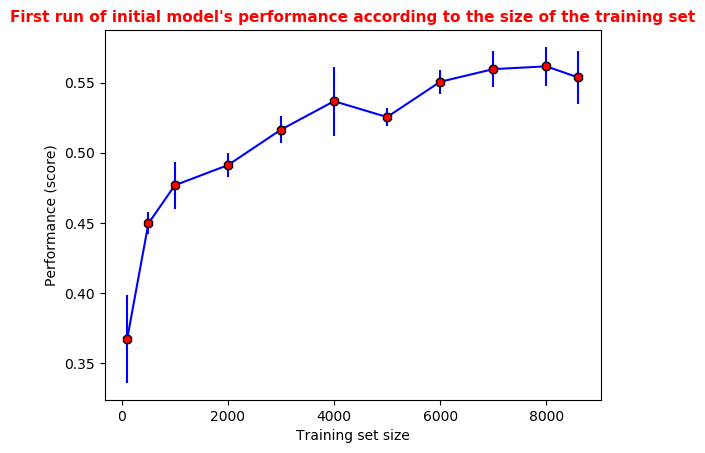

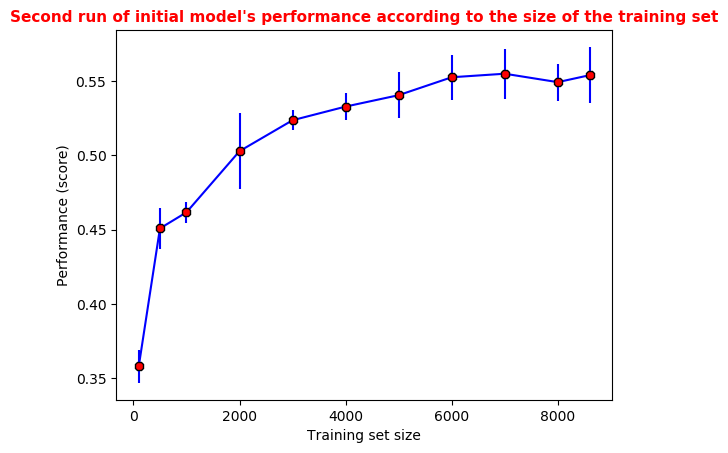

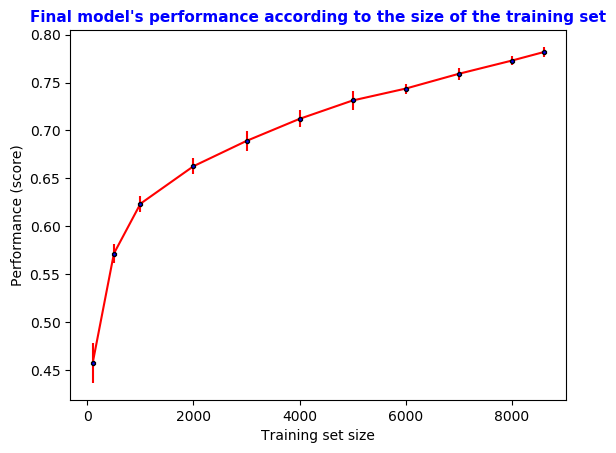

In [48]:
# Now we plot the performance using the previous results
settingsInitModel = ['Blue', '8', 6, 'Red']
settingsFinalModel = ['Red', '8', 3, 'Blue']

plot_performance(t, perfInitModel_1, settingsInitModel,
                 "First run of initial model's performance according to the size of the training set",
                 'red', 11, 'bold', 'test')

plot_performance(t, perfInitModel_2, settingsInitModel,
                 "Second run of initial model's performance according to the size of the training set",
                 'red', 11, 'bold', 'test')

plot_performance(t, perfFinalModel, settingsFinalModel,
                 "Final model's performance according to the size of the training set",
                 'blue', 11, 'bold', 'test')

<div style="background:cyan">
    <h3>Model performance</h3>
<p>
First we see for the initial model that the two curves and their error bars are different, we get this because during cross-validation the training set is shuffled.
We see that the score is much lower than the final model's score, the curves are not strictly increasing. We notice that the scores decreases for some sizes of the training set in both run. Best scores are reached for a size slightly less than 8000, however we note that from a size of 5000 elements for the training set in both run score no longer really increase, from 5000 the variations of score are quite low, this surely indicates that it is not necessary to use a size significantly greater than 5000 for the training set of the initial model.<br />
The score curve for the final model is strictly increasing unlike the previous ones. We notice that the curve does not seem to be stagnant for any value of the size of the training set, so the best score is obtained for the maximum size of 8061 and is worth about 0.78. We can imagine that we would get a higher score if we had more examples of learning.
</p>   
</div>

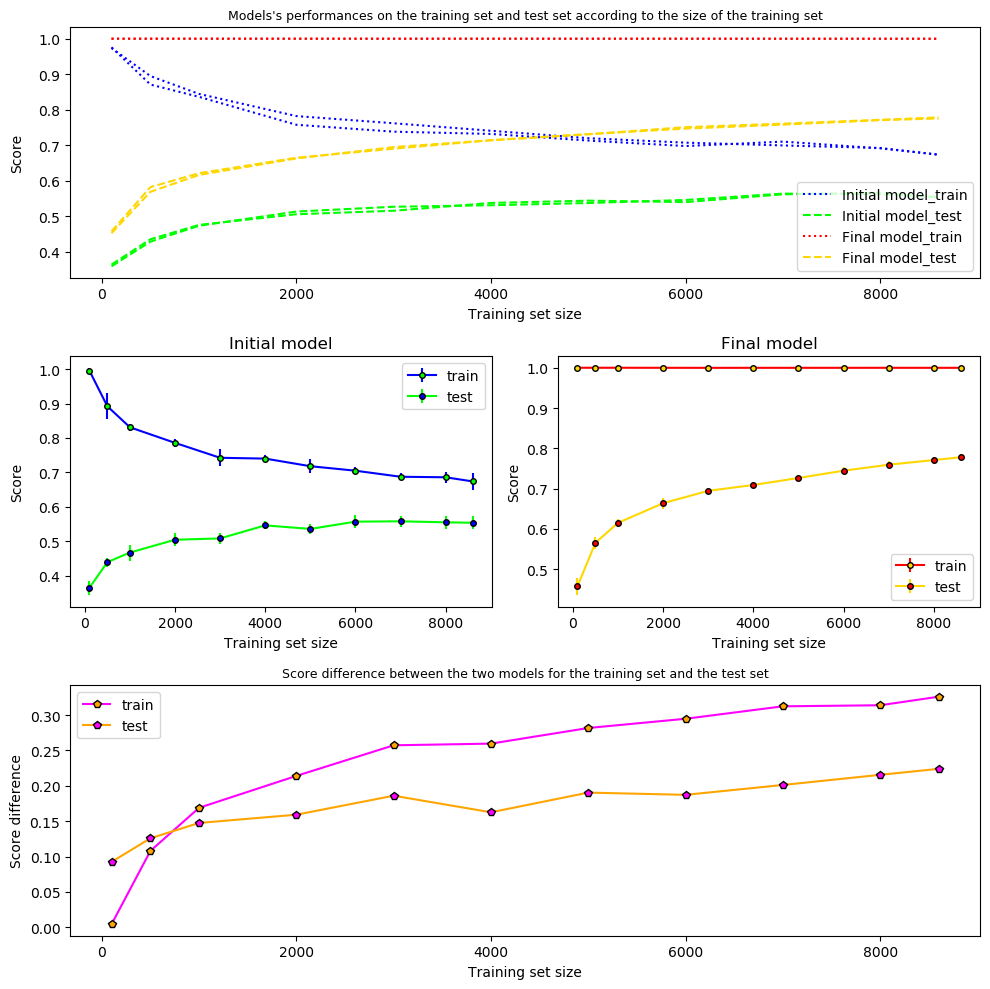

In [78]:
#We compare the initial model with the final one
plot_model_comparison(performance_M_ModelFinal, t, 10,'Initial model', 'Final model')

<div style="background:cyan">
<h3>Model comparizon</h3>
    <p>
The figure we get is divided into 3 parts:
        <ul>
            <li>In the first part we can see on the same graph the evolution of the performances of the two models according to the size of the learning set for the training and testing sets. We ran 2 times the learning curve for each model to see if we would see big changes and as we can see there is not.<br>
                Curves for trains sets are represented by dotted lines and those for tests sets by dashes
            <li>In the second one we see the results for each model individually.<br>
                The initial model makes a lot of mistakes during its training, it is then inefficient on the test set, where we can see that the final model gets a perfect score during its training and a much better score than the initial model on the test set. However, we note that the final model goes from 1 to about 0.78 between the training set and the test set. The final model seems to overfit.<br>
            <li>In the last part we see a graph representing the score difference between the sets of drives and tests between the two models.
                We see that the most important difference is at the level of the training set with a difference of 0.3 for the size of the maximum learning set, which impacts the difference for the test sets. <br>
       </ul>
   </p>    
</div>

<div style="background:#FFFFAA">
<h1> Step 3: Making a submission </h1> 

<h2> Unit testing </h2> 

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 
<br>
Keep the sample code simple.
</div>

In [26]:
!source activate python3; python $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

/bin/sh: 1: source: not found
Using input_dir: /home/ugo/projects/PLANKTON/starting_kit/public_data
Using output_dir: /home/ugo/projects/PLANKTON/starting_kit/sample_result_submission
Using program_dir: /home/ugo/projects/PLANKTON/starting_kit/ingestion_program
Using submission_dir: /home/ugo/projects/PLANKTON/starting_kit/sample_code_submission

========== Ingestion program version 6 ==========

************************************************
******** Processing dataset Plankton ********
************************************************
========= Reading and converting data ==========
Info file found : /home/ugo/projects/PLANKTON/starting_kit/public_data/plankton_public.info
========= Reading /home/ugo/projects/PLANKTON/starting_kit/public_data/plankton_feat.type
[+] Success in  0.00 sec
========= Reading /home/ugo/projects/PLANKTON/starting_kit/public_data/plankton_train.data
Replace missing values by 0 (slow, sorry)
[+] Success in  0.88 sec
========= Reading /home/ugo/projects/PLANK

<div style="background:#FFFFAA">
Also test the scoring program:
    </div>

In [ ]:
scoring_output_dir = 'scoring_output'
!source activate python3; python $score_dir/score.py $data_dir $result_dir $scoring_output_dir

<div style="background:#FFFFAA">
    <h1> Preparing the submission </h1>

Zip the contents of `sample_code_submission/` (without the directory), or download the challenge public_data and run the command in the previous cell, after replacing sample_data by public_data.
Then zip the contents of `sample_result_submission/` (without the directory).
<b><span style="color:red">Do NOT zip the data with your submissions</span></b>.

In [ ]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = './sample_code_submission_' + the_date + '.zip'
sample_result_submission = './sample_result_submission_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)